### Question 2(a)

In [1]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

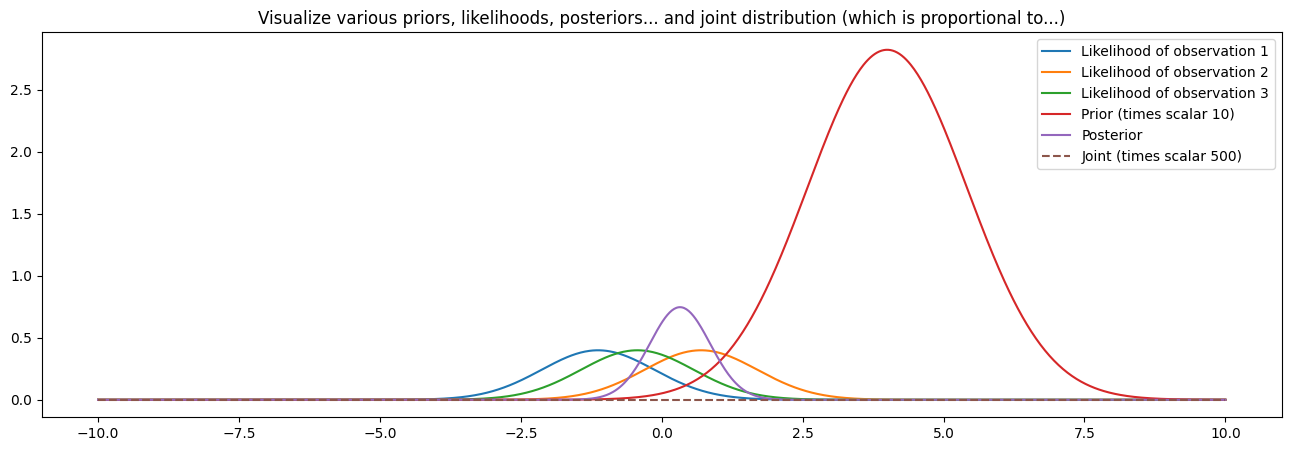

In [17]:
#We need to set seed for replication
np.random.seed(400)


#State the observation number
n = 3

x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
#Set up for the grid
parameter_domain = np.linspace(-10, 10, 1001)
# Then, for each observation, we can do a likelihood calculation
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]


# Prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Joint distribution for the visualization (elementwise multiplication of likelihood and prior)
joint = 500 * np.prod(likelihood, axis=0) * prior

# Posterior distribution
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))

# Plot individual likelihoods for each observation
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")


# Plot other distributions
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")

# Adding legend and title
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

# Show plot
plt.show()

## Question 2(b)

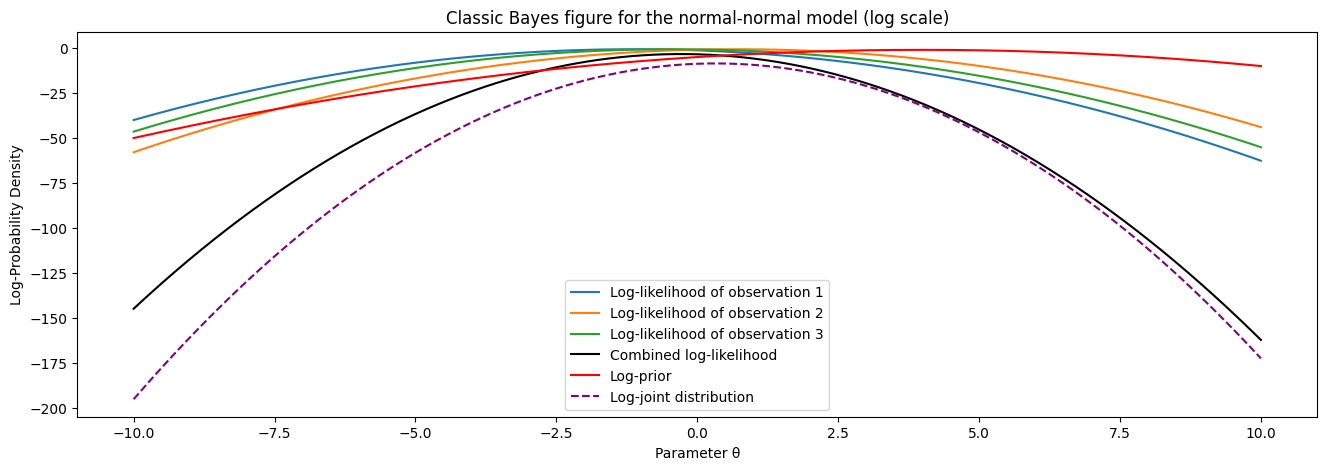

In [18]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameters from the normal-normal model
n = 3  # Number of observations
theta_0, tau = 4, 1/2  # Hyperparameters for the prior
phi = 1  # Precision for the likelihood (assuming sigma^2 = 1 for simplicity)

# Parameter domain for theta
parameter_domain = np.linspace(-10, 10, 1001)

# Log-likelihood for each observation
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

# Summing log-likelihoods for all observations to get the combined log-likelihood
combined_log_likelihood = log_likelihoods.sum(axis=0)

# Log-prior distribution
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# Log of the joint distribution (log-likelihood + log-prior)
log_joint = combined_log_likelihood + log_prior

# Plotting
plt.figure(figsize=(16, 5))

# Plotting the log-likelihoods for each observation
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

# Plotting the combined log-likelihood, log-prior, and log-joint distributions
plt.plot(parameter_domain, combined_log_likelihood, label="Combined log-likelihood", color='black')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='red')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='purple', linestyle='--')

# Adding legend and title
plt.legend()
plt.title("Classic Bayes figure for the normal-normal model (log scale)")
plt.xlabel("Parameter θ")
plt.ylabel("Log-Probability Density")

# Show plot without log scale due to negative log probabilities
plt.show()


[9.97800586e-64 1.78579715e-63 3.19226798e-63 ... 1.01500421e-70
 5.48460233e-71 2.96006528e-71]
